# Processamento de linguagem natural

a tecnologia possui sistema que tentam compreender e atuar em processamento de linguagem natural. Esses sistemas tentam entender a linguagem humana.

Usam conceitos baseados em linguistica e em regras gramaticas para criar algoritmos que possam extrair informações ou entimento. Sumarização, resumos de texto, tradução, chatbot e recuperação de informações

## Conceitos fundamentais

- ***Corpus***: Representa um conjunto de textos escritos em um idioma que foram anotados manualmente e servem de validação para as análises que serão feitas nos textos.

- ***Tokenização***:
É a divisão de um texto em partes menores que representam as palavras, chamada também de tokins.

- ***Stop words***:
Palavras que são removidas no processamento dos textos,  já que não afetam a compreensão do texto.



## Implementação dos conceitos

### Instalando e importando bibliotecas

In [6]:
# Instalação da biblioteca nlkt
! pip install nltk

     ---------------------------------------- 1.5/1.5 MB 800.2 kB/s eta 0:00:00
     ------------------------------------ 267.8/267.8 kB 715.3 kB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 1.5 MB/s eta 0:00:00


### Stop words

In [7]:
import nltk

In [8]:
# Baixando as stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
#Stop words em portugues
stopwords = nltk.corpus.stopwords.words('portuguese')

In [11]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [14]:
len(stopwords)

207

### Tokenização

In [18]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
frase = 'eu dirijo devagar porque nós queremos ver os animais.'

In [29]:
tokens = word_tokenize(frase)

In [30]:
print(tokens)

['eu', 'dirijo', 'devagar', 'porque', 'nós', 'queremos', 'ver', 'os', 'animais', '.']


In [31]:
for t in tokens:
    if t not in stopwords:
        print(t)

dirijo
devagar
porque
queremos
ver
animais
.


## TF - IDF

Frequencia e importância que uma palavra deve ter no texto. Existe um metodo matemático chamado de **TF - IDF** (frequencia do termo e frequencia inversa do documento) que é responsável por calcular estaticamente a importância que um termo tem em um texto, ou seja, é possivel saber quais termos são mais relevantes em um documento.

Esse método tenta atribuir um peso para definir a importância do termo em um documento com base na frequência que ele ocorre (FT), assim esse peso é diminuir o caso a ocorrencia desse termo seja muito grande.

> Se um termo aparece algumas vezes no texto o valor do "TF - IDF" aumenta, significando que aquela palavra é significante. Porém, se esse termo se repete bastante esse valor é compensado, e a importância dele é diminuída.

**Figura 2** - Relação TF e IDF

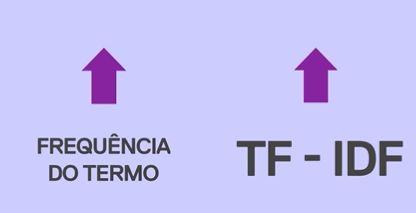

Fonte: Lead Dell

## Implementação TFIDFVECTORIZER
Da bibiloteca sklearing é usado para calcular os valores de TF-IDF de um texto. 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
import pandas as pd

In [34]:
texto1 = 'A matemática é muito importante para compreendermos como a natureza funciona'

In [36]:
# Usando o fit_transform
tf_idf = TfidfVectorizer()
vetor = tf_idf.fit_transform([texto1])
print(vetor)

  (0, 2)	0.35355339059327373
  (0, 6)	0.35355339059327373
  (0, 0)	0.35355339059327373
  (0, 1)	0.35355339059327373
  (0, 7)	0.35355339059327373
  (0, 3)	0.35355339059327373
  (0, 5)	0.35355339059327373
  (0, 4)	0.35355339059327373


In [37]:
# Tranformar em um array
vetor = vetor.todense()

In [38]:
print(vetor)

[[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
  0.35355339 0.35355339]]


In [42]:
# Associar os scores as palavras
nomes = tf_idf.get_feature_names()
print(nomes)

['como', 'compreendermos', 'funciona', 'importante', 'matemática', 'muito', 'natureza', 'para']


In [43]:
df = pd.DataFrame(vetor,columns = nomes)
print(df)

       como  compreendermos  funciona  importante  matemática     muito  \
0  0.353553        0.353553  0.353553    0.353553    0.353553  0.353553   

   natureza      para  
0  0.353553  0.353553  


In [44]:
texto2 = 'A matemática é incrível, quanto mais estudo matemática, mais eu consigo aprender matemática'

In [45]:
tf_idf = TfidfVectorizer()
vetor2 = tf_idf.fit_transform([texto2])


In [46]:
vetor2 = vetor2.todense()



In [49]:
nomes = tf_idf.get_feature_names()



c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
df = pd.DataFrame(vetor2, columns=nomes)
print(df)

   aprender   consigo    estudo        eu  incrível      mais  matemática  \
0  0.229416  0.229416  0.229416  0.229416  0.229416  0.458831    0.688247   

     quanto  
0  0.229416  
